In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 
import sympy as sp

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Solving BVP using Finite differences 

In [4]:
points = 100
y = np.linspace(0,1,points)
delta_y = y[1] - y[0]
P_values = [-2,0,2,5,10]

N = points
A = np.zeros((N,N))
np.fill_diagonal(A, -2)
for i in range(N):
    for j in range(N):
        if np.abs(i-j) == 1:
            A[i][j] = 1
            A[j][i] = 1 
            
A[0][0] = 1 ; A[0][1] = 0
A[-1][-1] = 1 ; A[-1][-2] = 0
A

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

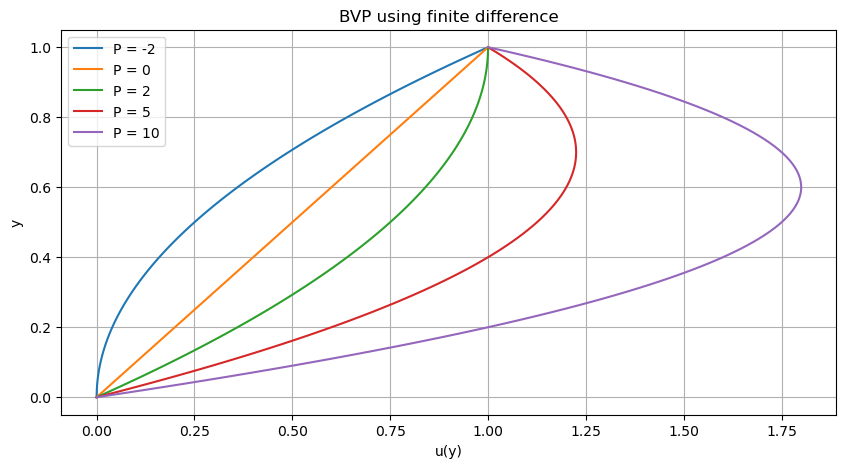

In [5]:
plt.figure(figsize = (10,5))
for P in P_values:
    b = np.ones(N)
    u = np.zeros(N)
    b = (-P * (delta_y)**2)*b
    b[0] = 0 ; b[-1] = 1
    A_inverse = np.linalg.inv(A)
    u = np.matmul(A_inverse, b)
    plt.plot(u, y, label = f'P = {P}')
    
plt.legend()
plt.title('BVP using finite difference')
plt.ylabel('y')
plt.xlabel('u(y)')
plt.grid()
plt.show()

### Solving IVP using Explicit Euler

- $ u(0) = 0, v(0) = s, u(1) = 1 $
- ![Image of Differential Equations](./Pic1.png)

S Value: 0.01503
S Value: 1.005
S Value: 1.995
S Value: 3.48
S Value: 5.955


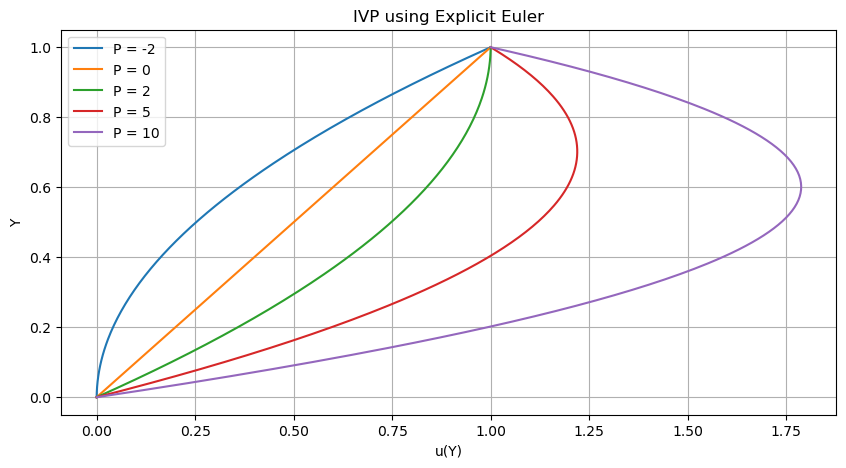

In [6]:
n = 200
Y = np.linspace(0, 1, n)
h = 1 / n                #smaller step size for explicit  
P_values = [-2, 0, 2, 5, 10]

def explicit_euler(s, P):
    u = np.zeros(n)
    u1 = np.zeros(n)
    u[0] = 0 
    u1[0] = s  
    
    for i in range(n-1): 
        u[i+1] = u[i] + h * u1[i]
        u1[i+1] = u1[i] - h * P
    
    return u, u1

def s_explicit(s, P):
    u, _ = explicit_euler(s, P)
    return u[-1] - 1

plt.figure(figsize=(10, 5))

for P in P_values:
    slope = fsolve(s_explicit, 0, args=(P))[0]
    print(f"S Value: {slope:0.4}")
    u_final, _ = explicit_euler(slope, P)
    plt.plot(u_final, Y, label=f'P = {P}')

plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('u(Y)')
plt.title('IVP using Explicit Euler')
plt.show()

### IVP using Implicit Euler

S Value: 0.0101
S Value: 1.01
S Value: 2.01
S Value: 3.51
S Value: 6.01


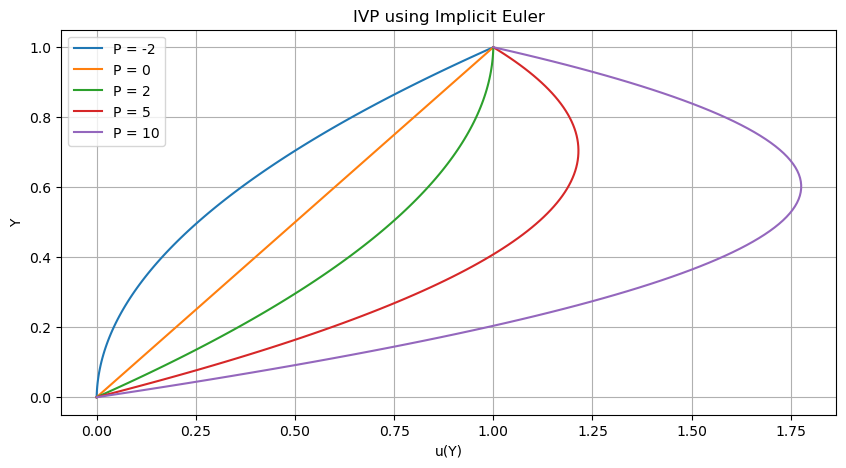

In [7]:
n = 100
Y = np.linspace(0, 1, n)
h = 1 / n           
P_values = [-2, 0, 2, 5, 10]

def implicit_euler(s, P):
    u = np.zeros(n)
    u1 = np.zeros(n)
    u[0] = 0
    u1[0] = s
    for i in range(n-1):
        u1_new = u1[i] - h * P
        u_new = u[i] + h * u1_new
        u[i+1] = u_new
        u1[i+1] = u1_new
    
    return u, u1

def s_implicit(s, P):
    u, _ = implicit_euler(s, P)
    return u[-1] - 1  

plt.figure(figsize=(10, 5))

for P in P_values:
    slope = fsolve(s_implicit, 0.5, args=(P))[0]
    print(f"S Value: {slope:0.4}")
    u_final, u1_final = implicit_euler(slope, P)
    plt.plot(u_final, Y, label=f'P = {P}')

plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('u(Y)')
plt.title('IVP using Implicit Euler')
plt.show()

### Eigenvalues of Jacobian 

Given, the following first order equations: <br>
<img src="./Pic1.png" width="100" height="150"><br>
We have Jacobi Matrix as: <br>
<img src="./Pic3.png" width="100" height="150"><br>
Where,
  - $ f_{1} = v $ 
  - $ f_{2} = -P $

In [8]:
v = sp.symbols('v')
u = sp.symbols('u')

dudt = v
dvdt = -P

def Jacobian(dudt,dvdt):
    
    dudt_u = sp.diff(dudt, u)
    dudt_v = sp.diff(dudt, v)
    dvdt_u = sp.diff(dvdt, u)
    dvdt_v = sp.diff(dvdt, v)
    J = np.array ([[dudt_u, dudt_v], [dvdt_u, dvdt_v]], dtype = float)

    return J

In [9]:
def lud(a):
    n = a.shape[0]
    l = np.zeros((n, n))
    u = np.zeros((n, n))
    np.fill_diagonal(l, 1)
    u[0] = a[0]

    for i in range(1, n):
        for j in range(n):
            if i <= j:
                u[i][j] = a[i][j] - sum(u[k][j] * l[i][k] for k in range(i))
            if i > j:
                l[i][j] = (a[i][j] - sum(u[k][j] * l[i][k] for k in range(j))) / u[j][j]
                
    return l, u
    
def shift(A):
    possible_shift_vals = []
    
    for i in range(np.shape(A)[0]):
        up_lim = A[i][i]
        low_lim = A[i][i] 
        
        for j in range(np.shape(A)[0]):
            if i != j :
                up_lim=up_lim+abs(A[i][j])
                low_lim=low_lim-abs(A[i][j])
                
        possible_shift_vals.append(up_lim )
        possible_shift_vals.append(low_lim)    

    shift=np.max(np.abs(possible_shift_vals))
    return shift

def UL_eigen (A, iters= 50000, tol = 1e-15):
    m,n = A.shape 
    I = np.identity (np.shape(A)[0])
    shift_A = shift(A) + 1
    A = A + I * (shift_A)
    
    D1 = A ; D2 = np.ones(np.shape(A))
    iter = 0
  
    while (np.allclose(np.diagonal (D1), np.diagonal (D2), tol)==False) :
        L,U = lud(D1)
        D2 = np.matmul (U,L)
        
        if (np.allclose(np.diagonal (D1), np.diagonal (D2), tol)==True):
            return np.diagonal(D2) -(shift_A)
            
        D1 = D2
        D2 = np.zeros((m,n))
        iter = iter + 1

        if (iter > iters):
            raise ValueError ("System fails to converge after 50000 iterations. Try another matrix")
            return "NA"

In [10]:
UL_eigen(Jacobian(dudt,dvdt))

array([0., 0.])

### Analytical Solution

SOLUTION BY ANALYTICAL METHODS

P = -2, Particular Solution: 


Eq(f(x), x**2)

P = 0, Particular Solution: 


Eq(f(x), x)

P = 2, Particular Solution: 


Eq(f(x), -x**2 + 2*x)

P = 5, Particular Solution: 


Eq(f(x), -5*x**2/2 + 7*x/2)

P = 10, Particular Solution: 


Eq(f(x), -5*x**2 + 6*x)

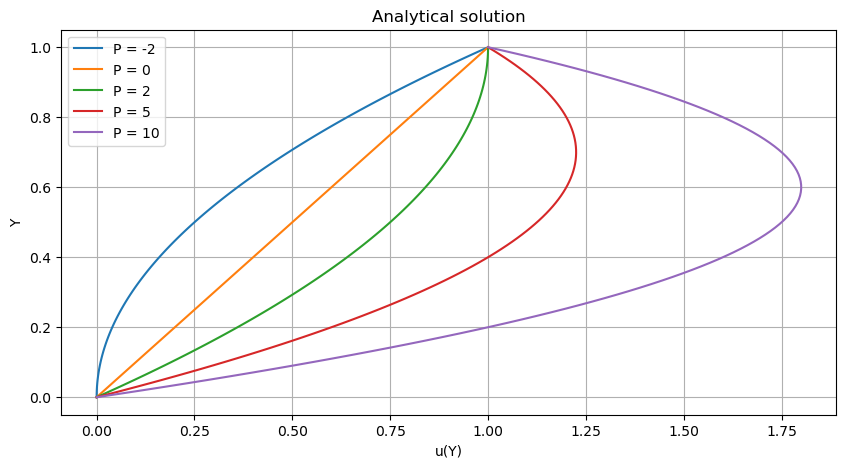

In [11]:
from sympy import Function, dsolve, Eq, Derivative, symbols, solve, latex

x = symbols('x')
f = Function('f')
P_values = [-2,0,2,5,10]
plt.figure(figsize=(10, 5))
print( "SOLUTION BY ANALYTICAL METHODS\n")

for P in P_values:
    ode = Eq(Derivative(f(x), x, x) + P, 0)
    general_solution = dsolve(ode)                    #solves the ODE
    boundary_conditions = {f(0): 0, f(1): 1}

    constants = solve([general_solution.rhs.subs(x, 0) - boundary_conditions[f(0)],
                       general_solution.rhs.subs(x, 1) - boundary_conditions[f(1)]])
                       
    particular_solution = general_solution.subs(constants)
    
    print(f"P = {P}, Particular Solution: "); display(particular_solution)
    
    x_ = np.linspace(0,1,100)
    y_ = np.zeros(len(x_))
    for i in range(len(x_)):
        y_[i] = particular_solution.rhs.subs(x,x_[i])
    plt.plot(y_, x_, label = f'P = {P}')


plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('u(Y)')
plt.title('Analytical solution')
plt.show()

s value by shooting method  0.03010101010100963
s value by shooting method  1.0101010101010104
s value by shooting method  1.9901010101010104
s value by shooting method  3.460101010101008
s value by shooting method  5.910101010101003


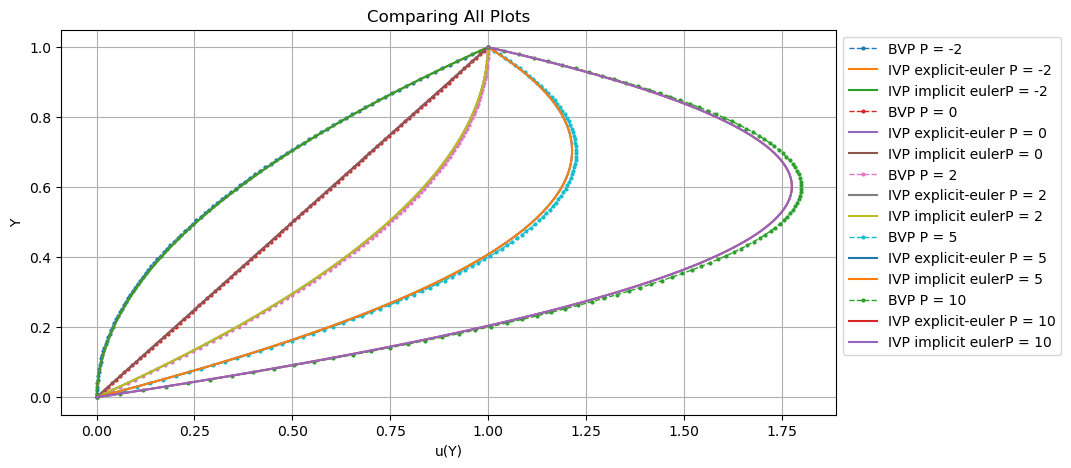

In [12]:
plt.figure(figsize=(10, 5))

for P in P_values:
    b = np.ones(N)
    u = np.zeros(N)
    b = (-P * (delta_y)**2)*b
    b[0] = 0 ; b[-1] = 1
    
    A_inverse = np.linalg.inv(A)
    u = np.matmul(A_inverse, b)
    plt.plot(u, Y, marker='o', linestyle='dashed' ,linewidth=1, markersize=2, label = f'BVP P = {P}')
    
    slope = fsolve(s_explicit, 1, args=(P))[0]
    print("s value by shooting method ", slope)
    u_final, _ = explicit_euler(slope, P)
    plt.plot(u_final, Y, label=f'IVP explicit-euler P = {P}')
    
    slope = fsolve(s_implicit, 0.5, args=(P))[0]
    u_final, u1_final = implicit_euler(slope, P)
    plt.plot(u_final, Y, label=f'IVP implicit eulerP = {P}')
    
plt.legend(bbox_to_anchor = (1,1))
plt.grid()
plt.ylabel('Y')
plt.xlabel('u(Y)')
plt.title('Comparing All Plots')
plt.show()